In [ ]:
from script_c import *

In [ ]:
datasets = [MNIST_like("../data/", dataset=dataset_name, train=True, download=False, transform=tf) for dataset_name in dataset_names]

In [ ]:
[dataset.data.shape for dataset in datasets]

In [1]:
import sys
#sys.path.append("..")
#sys.path.append("../code_digits/")
from train import source_domain_numpy
from torchvision import models, transforms
from torch.utils.data import DataLoader

transforms_train = transforms.Compose([transforms.Resize(28),transforms.ToTensor(),transforms.Normalize([0.5], [0.5])])

dataset = source_domain_numpy(root="../data", root_list='mnist,mnist_m,svhn,syn_digits', transform=transforms_train)

GPU Av: 8
20000 4


In [4]:
#loaders = torch.utils.data.DataLoader(data_set, batch_size=256, shuffle=True,
#       num_workers=config['num_workers'],
#       pin_memory=True,
#       worker_init_fn=np.random.seed,drop_last=True)
batch_size=256
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=5)

In [13]:
pbar = dataloader
loss_ema = None
for x, c, d in pbar:
    break

In [ ]:
n_epoch = 100
batch_size = 256
n_T = 400 # 500
device = "cuda:0"
n_classes = 10
n_domains = 4
n_feat = 128 # 128 ok, 256 better (but slower)
lrate = 1e-4
save_model = False
save_dir = './data/diffusion_outputs10/'
ws_test = [0.0, 0.5, 2.0] # strength of generative guidance

in_channels = 3 #1
ddpm = DDPM(nn_model=ContextUnet(in_channels=in_channels, n_feat=n_feat, n_classes=n_classes, n_domains=n_domains), betas=(1e-4, 0.02), n_T=n_T, device=device, drop_prob=0.1)
ddpm.to(device)

# optionally load a model
# ddpm.load_state_dict(torch.load("./data/diffusion_outputs/ddpm_unet01_mnist_9.pth"))

#tf = transforms.Compose([transforms.ToTensor()]) # mnist is already normalised 0 to 1
tf = tf = transforms.Compose([transforms.Resize(28), transforms.ToTensor()]) 
#dataset = MNIST("./data", train=True, download=True, transform=tf)

#dataset = SVHN("../data", train=True, download=False, transform=tf)
#dataset = SVHN("/data/medical_images/ahn/DA_Infer/mnist_raw/", train=True, download=False, transform=tf)
#dataset = MNIST_like("../data/", dataset="SVHN", train=True, download=False, transform=tf)

#dataset = MNIST("/data/medical_images/ahn/DA_Infer/mnist_raw/", train=True, download=False, transform=tf)
dataset = torch.utils.data.ConcatDataset([MNIST_like("../data/", dataset=dataset_name, train=True, download=False, transform=tf) for dataset_name in dataset_names])
#dataset = torch.utils.data.Subset(dataset, np.random.choice(range(len(dataset)), size=100, replace=False))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=5)
optim = torch.optim.Adam(ddpm.parameters(), lr=lrate)

for ep in range(n_epoch):
    print(f'epoch {ep}')
    ddpm.train()

    # linear lrate decay
    optim.param_groups[0]['lr'] = lrate*(1-ep/n_epoch)

    pbar = tqdm(dataloader)
    loss_ema = None
    for x, c in pbar:
        optim.zero_grad()
        x = x.to(device)
        c = c.to(device)
        break
    break

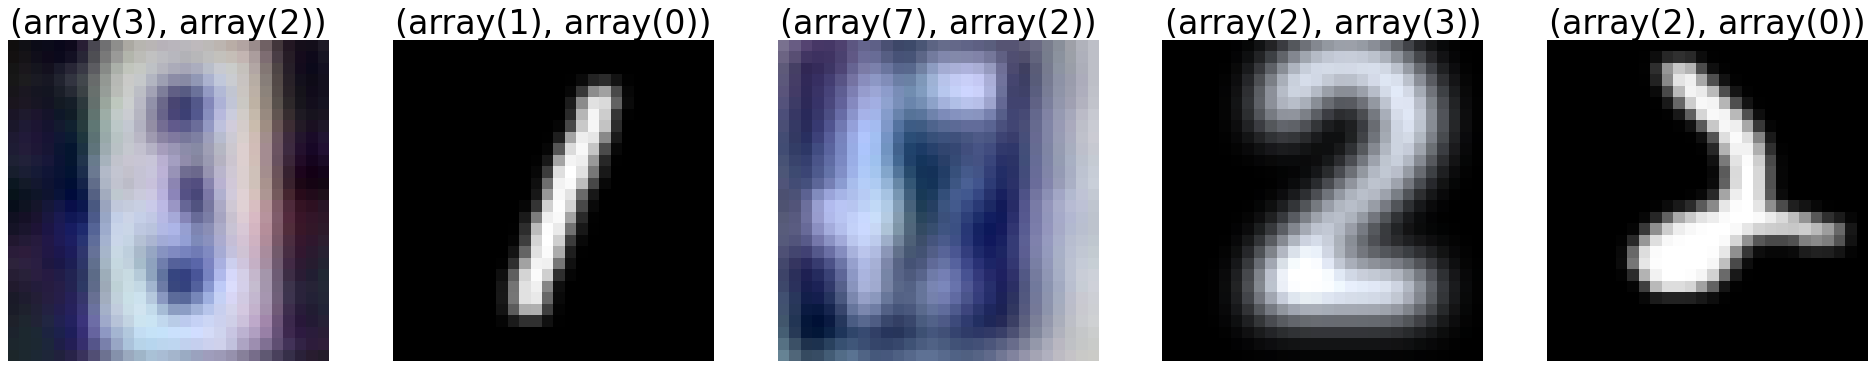

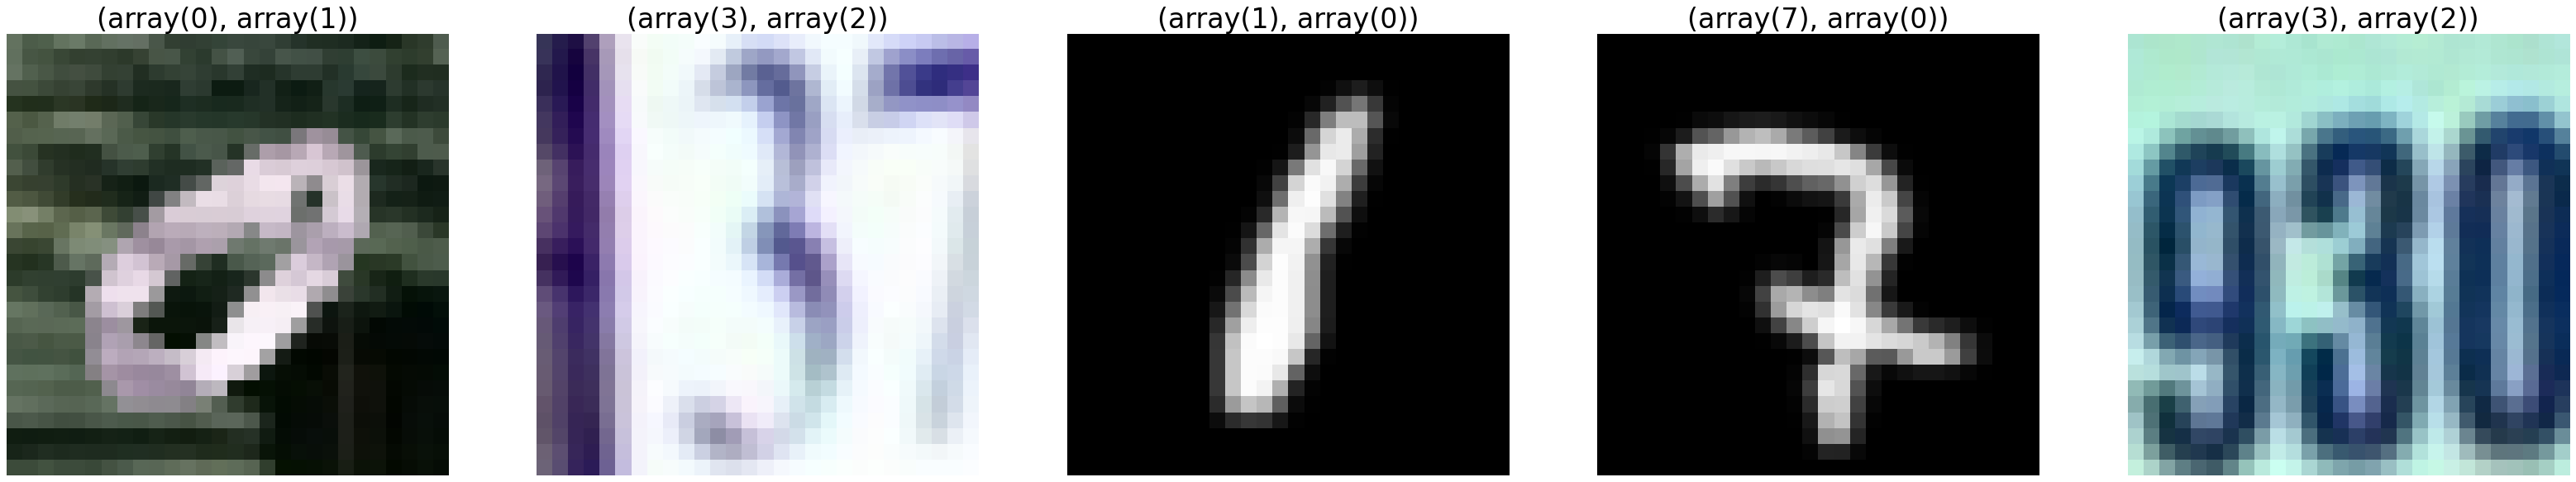

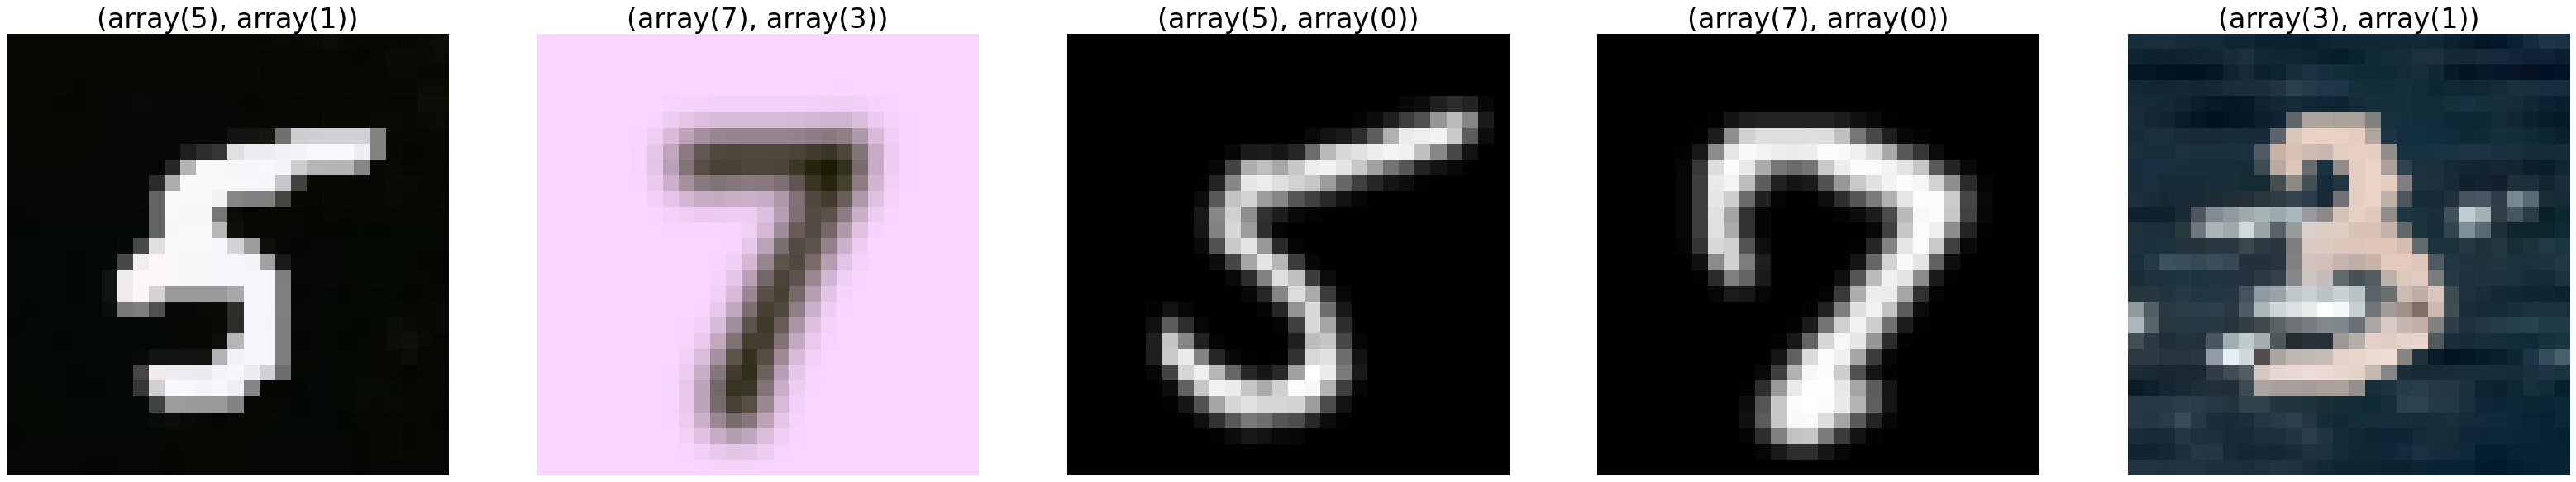

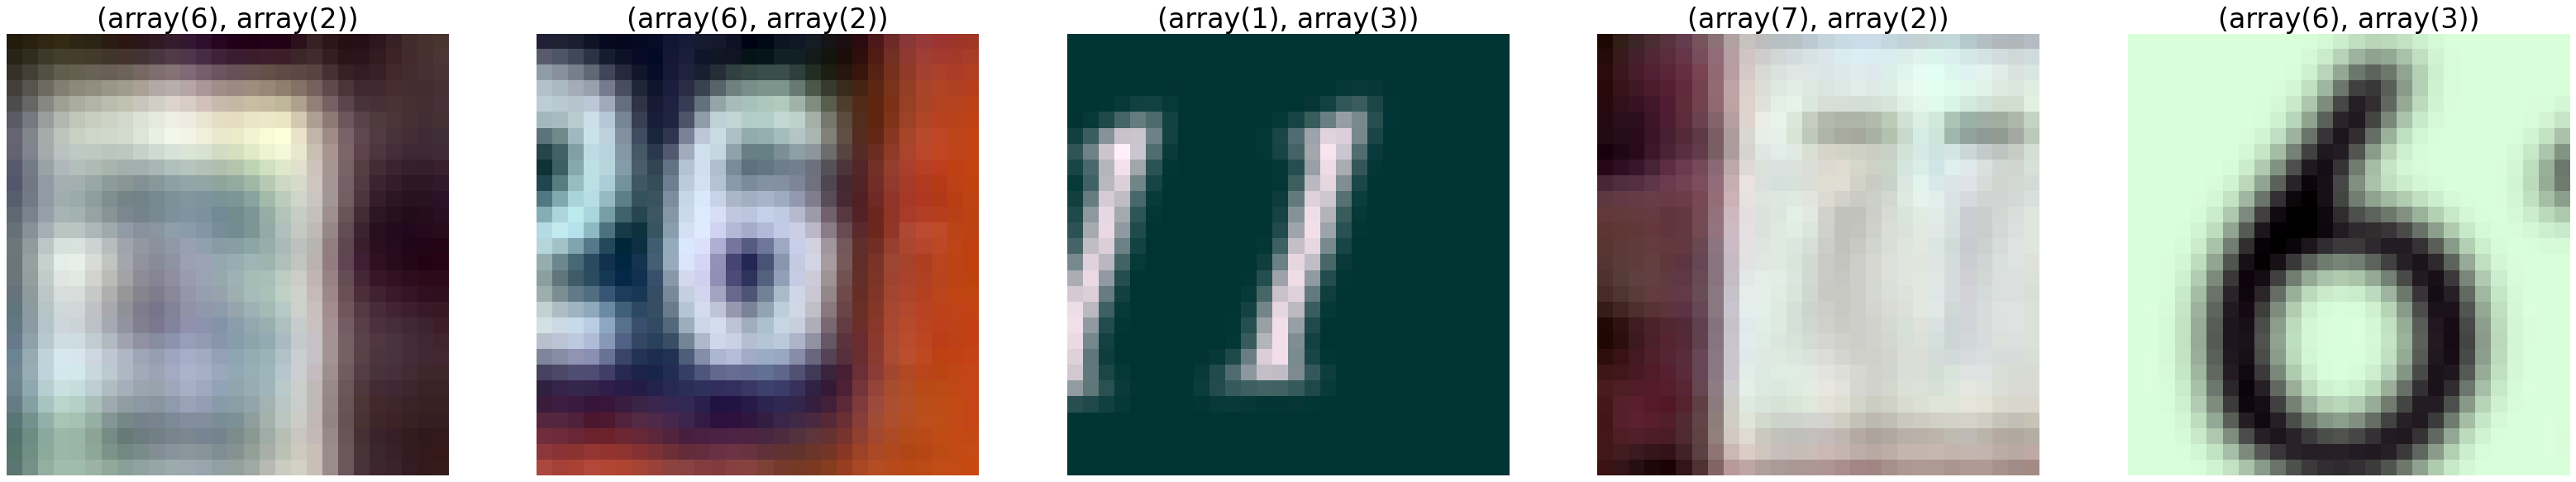

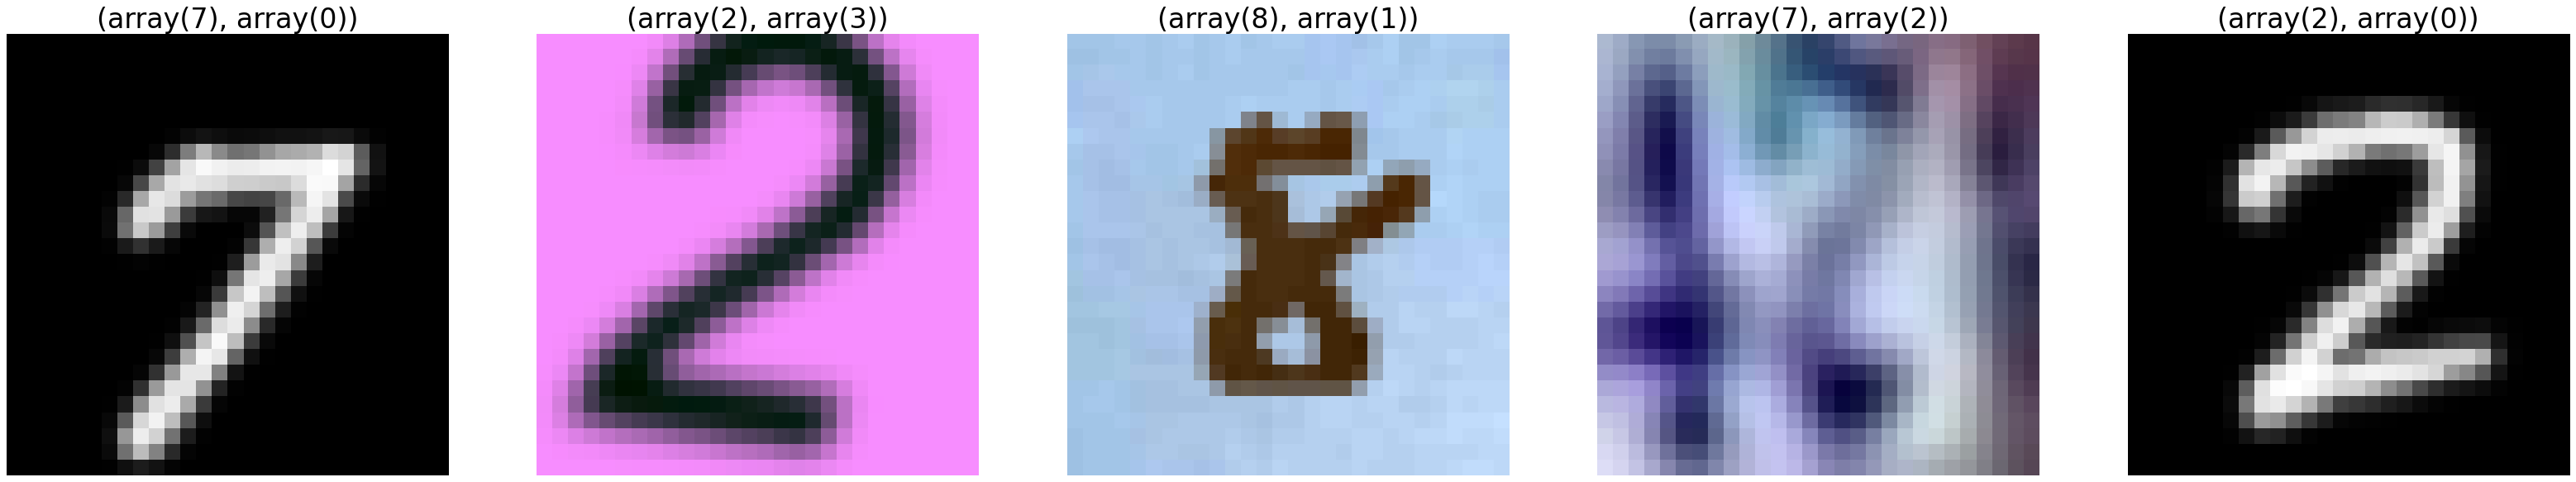

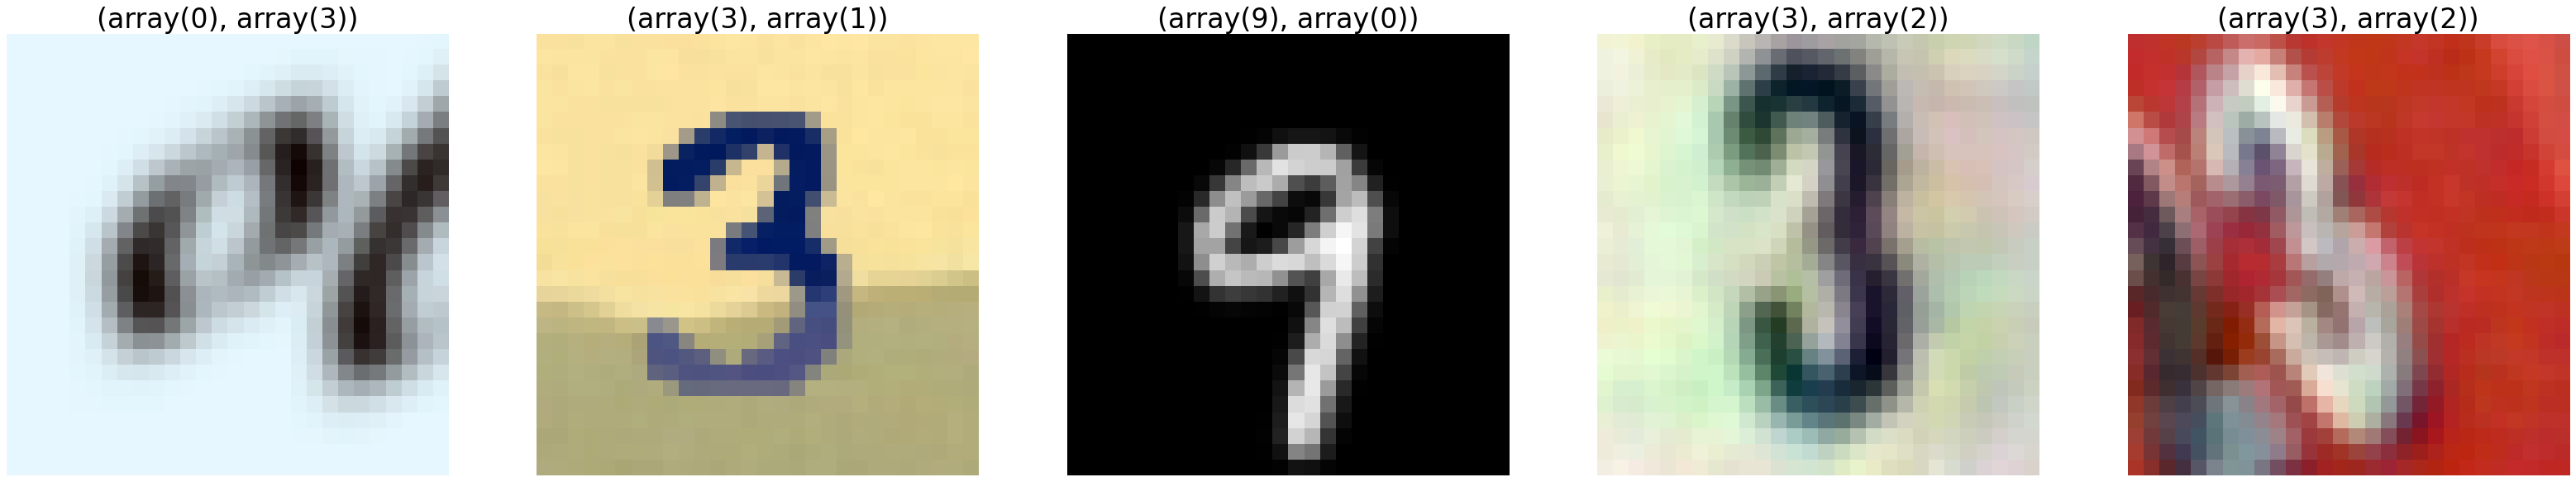

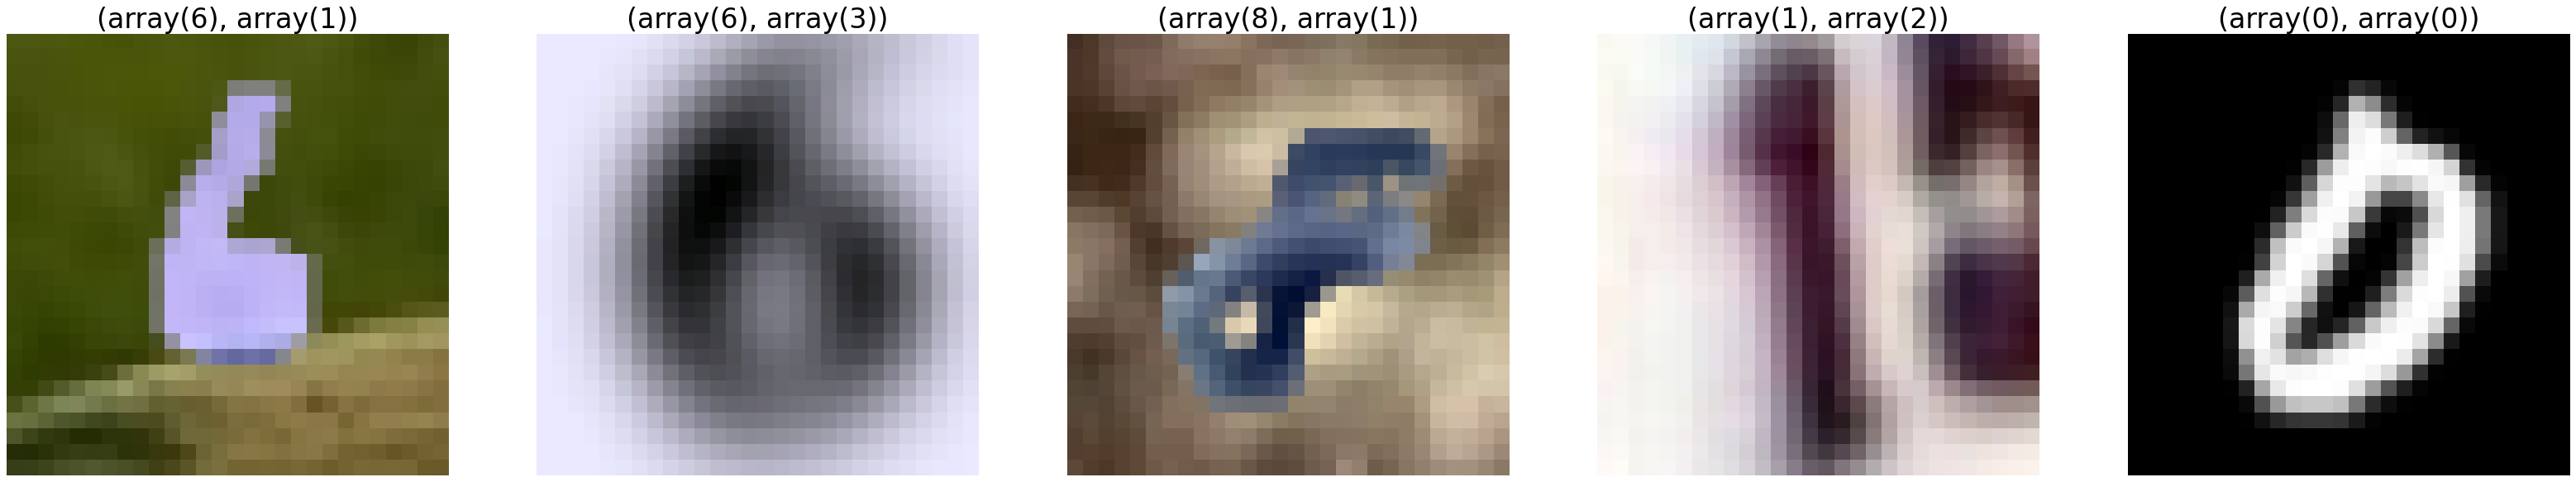

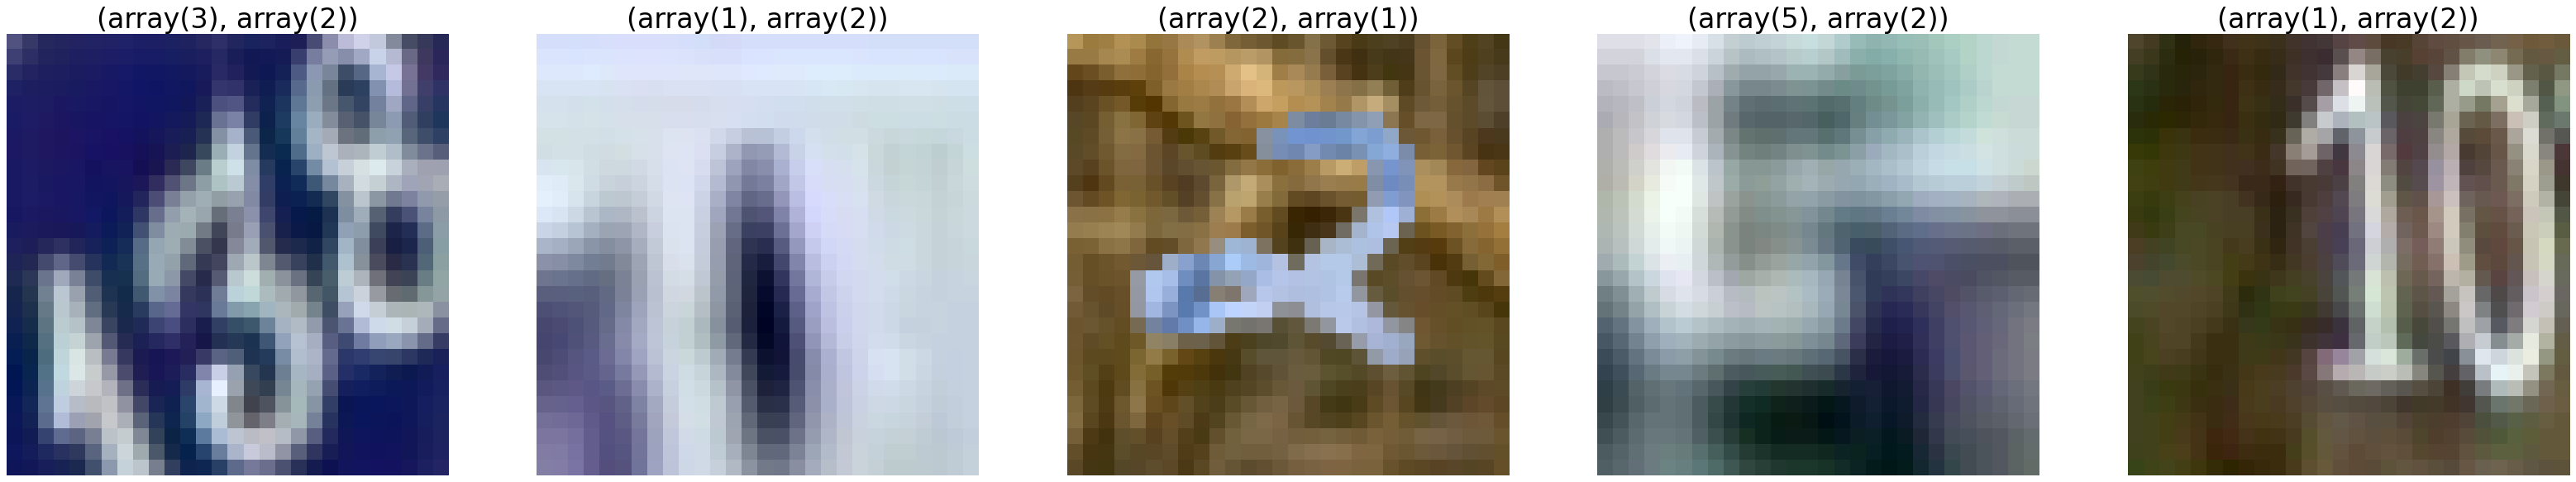

<Figure size 4000x800 with 0 Axes>

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(30, 10), dpi=80)
count = 0
plots = 5
start, end = 10, 50
for i in range(start, end):
    plt.subplot(1, plots, count+1)
    plt.axis('off')

    img = x[i].detach().cpu().numpy().transpose(1, 2, 0)

    img = (img - img.min())/(img.max() - img.min())
    plt.title((c[i].detach().cpu().numpy(), d[i].detach().cpu().numpy()), fontsize=30)
    plt.imshow(img)
    count+=1
    if(count==plots):
        plt.show()
        figure(figsize=(50, 10), dpi=80)
        count=0
plt.show()

In [ ]:
c